In [33]:
import numpy as np
import qutip as qu
from numba import jit
from aux import *

In [34]:
seed = 2
dimensions = np.arange(2, 16)
rng = np.random.default_rng(seed)
repetitions = 1000
rhos = [[qu.rand_dm(d)[:] for _ in range(repetitions)]for d in dimensions]

In [35]:
mse_array = [np.mean([compute_eig_newton_identities(i, rhos_given_dimension[sample_i]) for sample_i in range(repetitions)]) for i,rhos_given_dimension in zip(dimensions, rhos )]

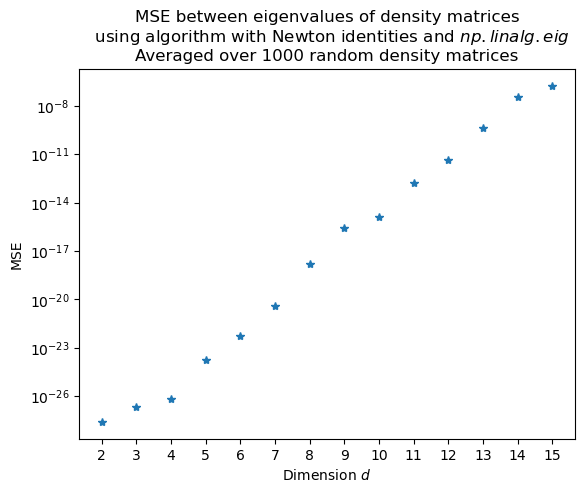

In [41]:
import matplotlib.pyplot as plt

plt.plot(dimensions, mse_array, '*')
plt.yscale('log')
plt.xlabel(r"Dimension $d$")
plt.ylabel("MSE")
plt.xticks(dimensions)
plt.title(r'MSE between eigenvalues of density matrices' + "\n" + r'  using algorithm with Newton identities and $np.linalg.eig$ ' + f"\nAveraged over {repetitions} random density matrices")
plt.show()